In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

## Raw data

In [2]:
poke_df = pd.read_csv('datasets/Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [4]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null object
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


## Feature Engineering

- Numeric data
- Categorical data
- Text data
- Temporal data
- Image data

... ...

## Feature Engineering with Numeric features

### Values

In [5]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [6]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


### Counts

In [7]:
popsong_df = pd.read_csv('datasets/song_views.csv', encoding='utf-8')
popsong_df.head()

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0


### Binarization

In [10]:
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [11]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


### Rounding

In [12]:
items_popularity = pd.read_csv('datasets/item_popularity.csv', encoding='utf-8')
items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [13]:
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


### Interaction

In [14]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [16]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[    49.,     49.,   2401.,   2401.,   2401.],
       [    62.,     63.,   3844.,   3906.,   3969.],
       [    82.,     83.,   6724.,   6806.,   6889.],
       ..., 
       [   110.,     60.,  12100.,   6600.,   3600.],
       [   160.,     60.,  25600.,   9600.,   3600.],
       [   110.,    120.,  12100.,  13200.,  14400.]])

In [17]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


Transforming new data in the future

In [18]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]], columns=['Attack', 'Defense'])
new_df

,Attack,Defense
0,95,75
1,121,120
2,77,60


In [19]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
new_intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


### Binning hist

In [21]:
fcc_survey_df = pd.read_csv('datasets/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


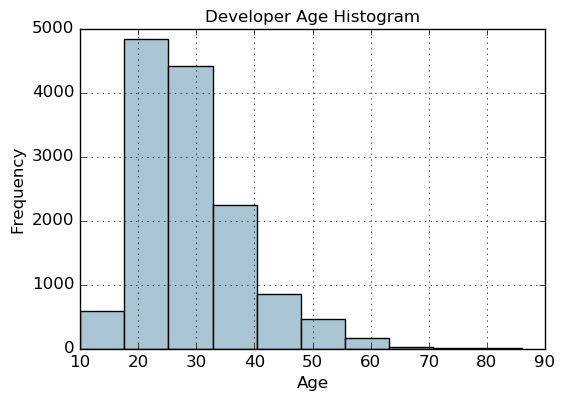

In [22]:
### Fix-width binning
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [23]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [24]:
# Binning based on custom ranges
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


In [25]:
# Quantile based binning
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

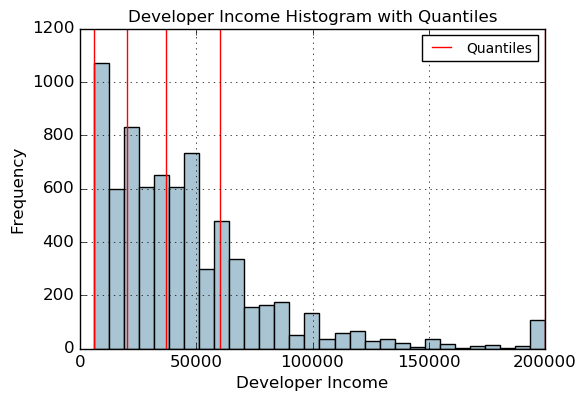

In [26]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [27]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income', 
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


### Math Transformation

Log transformation

In [31]:
fcc_survey_df['Income_Log'] = np.log((1 + fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Imcome_Log']].iloc[4: 9]

,ID.x,Age,Income,Imcome_Log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


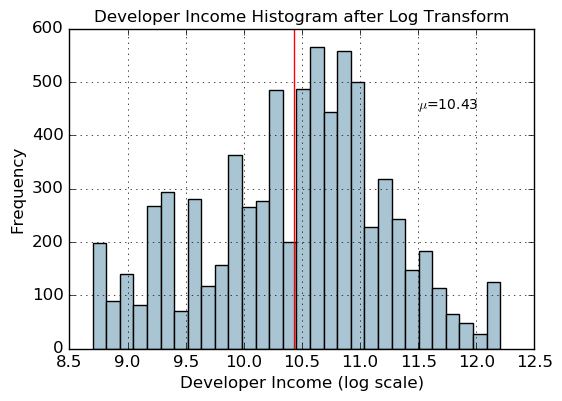

In [32]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_Log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_Log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

## Feature Engineering with Categorical data

- Nominal Feature (**no order**)
- Ordinal Feature (**order**)

### Nominal Feature

In [33]:
vg_df = pd.read_csv('datasets/vgsales.csv', encoding='utf-8')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [34]:
genres = np.unique(vg_df['Genre'])
genres

array([u'Action', u'Adventure', u'Fighting', u'Misc', u'Platform',
       u'Puzzle', u'Racing', u'Role-Playing', u'Shooter', u'Simulation',
       u'Sports', u'Strategy'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genres_labels = gle.fit_transform(vg_df['Genre'])
genres_mappings = {index: label for index, label in enumerate(gle.classes_)}
genres_mappings

{0: u'Action',
 1: u'Adventure',
 2: u'Fighting',
 3: u'Misc',
 4: u'Platform',
 5: u'Puzzle',
 6: u'Racing',
 7: u'Role-Playing',
 8: u'Shooter',
 9: u'Simulation',
 10: u'Sports',
 11: u'Strategy'}

In [36]:
vg_df['GenreLabel'] = genres_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


### Oridnal Feature

In [37]:
poke_df = pd.read_csv('datasets/Pokemon.csv', encoding='utf-8')
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)

np.unique(poke_df['Generation'])

array([u'Gen 1', u'Gen 2', u'Gen 3', u'Gen 4', u'Gen 5', u'Gen 6'], dtype=object)

In [38]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3, 
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6}

poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[4:10]

,Name,Generation,GenerationLabel
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


### Encoding Categorical Features

In [39]:
poke_df[['Name', 'Generation', 'Legendary']].iloc[4:10]

,Name,Generation,Legendary
4,Octillery,Gen 2,False
5,Helioptile,Gen 6,False
6,Dialga,Gen 4,True
7,DeoxysDefense Forme,Gen 3,True
8,Rapidash,Gen 1,False
9,Swanna,Gen 5,False


In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = gen_labels

leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = leg_labels

poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_sub.iloc[4:10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Octillery,Gen 2,1,False,0
5,Helioptile,Gen 6,5,False,0
6,Dialga,Gen 4,3,True,1
7,DeoxysDefense Forme,Gen 3,2,True,1
8,Rapidash,Gen 1,0,False,0
9,Swanna,Gen 5,4,False,0


In [41]:
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)

# encode legendary status labels using one-hot encoding scheme
leg_ohe = OneHotEncoder()
leg_feature_arr = leg_ohe.fit_transform(poke_df[['Lgnd_Label']]).toarray()
leg_feature_labels = ['Legendary_'+str(cls_label) for cls_label in leg_le.classes_]
leg_features = pd.DataFrame(leg_feature_arr, columns=leg_feature_labels)

In [42]:
poke_df_ohe = pd.concat([poke_df_sub, gen_features, leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'],gen_feature_labels,
              ['Legendary', 'Lgnd_Label'],leg_feature_labels], [])
poke_df_ohe[columns].iloc[4:10]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
4,Octillery,Gen 2,1,0.0,1.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5,Helioptile,Gen 6,5,0.0,0.0,0.0,0.0,0.0,1.0,False,0,1.0,0.0
6,Dialga,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,True,1,0.0,1.0
7,DeoxysDefense Forme,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
8,Rapidash,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
9,Swanna,Gen 5,4,0.0,0.0,0.0,0.0,1.0,0.0,False,0,1.0,0.0
